<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/05_an_airline_sales_analysis/5_Data_mining(Yandex_Practicum_eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline data analysis (Data cleaning, EDA)

<b>Task:</b>
Import two datasets and do the following analytics:
- top 10 cities by the number of flights;
- aircraft models and the number of flights;
- cities and the number of flights;
- top 10 cities by the number of flights;
<br>
<b>Data description: </b>
<br>
/datasets/query_1.csv - the result of the first SQL query. It contains the following information:
- model
- flight_amount - the number of flights for each aircraft model in September 2018.
<br>
/datasets/query_3.csv  - the result of the third SQL query. It contains the following columns:
- city
- average_flights - the average number of flights arriving in the city per day in August 2018.

### Getting data

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Import from csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
aircrafts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/query_1.csv')
aircrafts.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
cities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/query_3.csv')
cities.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


### Data processing

#### Data types, duplicates and missing values

In [5]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Checking for duplicates

In [7]:
aircrafts.duplicated().sum()

0

In [8]:
cities.duplicated().sum()

0

<b>Results:</b><br>
    There are no missing values or duplicates. The data types are correct.

### EDA

#### Descriptive statistics

In [9]:
aircrafts.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [10]:
aircrafts['model'].describe()

count                   8
unique                  8
top       Airbus A319-100
freq                    1
Name: model, dtype: object

In [11]:
cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [12]:
cities['city'].describe()

count        101
unique       101
top       Абакан
freq           1
Name: city, dtype: object

<b>Results:</b>
<br>
1. There are 8 aircraft models. Each model has on average 2035 +/- 1965 flights; the median (795) is well below the mean. Therefore, there is one or several popular models which flew often and others that flew rarely.
<br>
2. There are 101 cities in the dataset. The average daily number of arrivals is 5.49 +/- 13.11, the median equals 3. The mean is higher than the median, so it could be a right-skewed distribution.

#### Number of flights by aircraft model

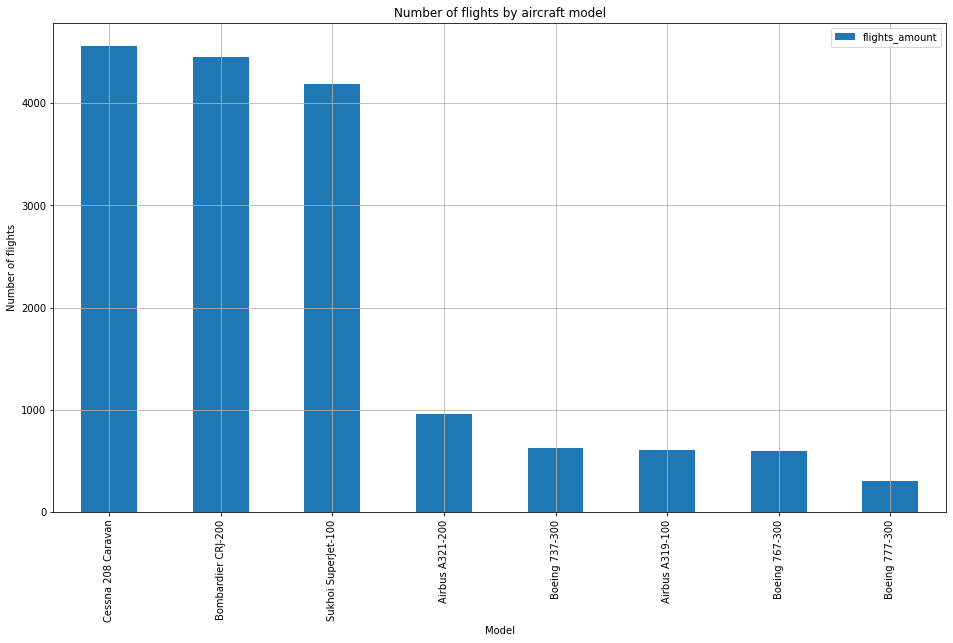

In [13]:
aircrafts.sort_values(by='flights_amount', ascending=False).plot(kind='bar', x='model', grid=True, figsize=(16,9))
plt.title('Number of flights by aircraft model')
plt.xlabel('Model')
plt.ylabel('Number of flights')
plt.show()

<b>Results:</b> In September 2018, the number of flights was significantly higher for the three aircraft models: Cessna, Bombardier, Sukhoi.

#### Number of flights by city

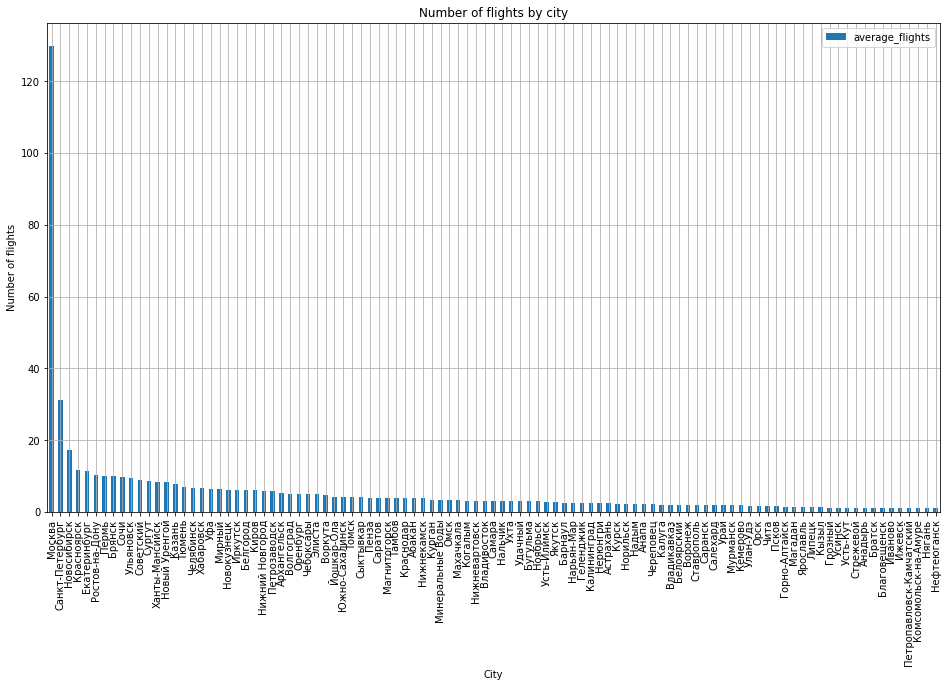

In [14]:
cities.sort_values(by='average_flights', ascending=False).plot(kind='bar', x='city', grid=True, figsize=(16,9))
plt.title('Number of flights by city')
plt.xlabel('City')
plt.ylabel('Number of flights')
plt.show()

#### Top 10 cities by the number of flights

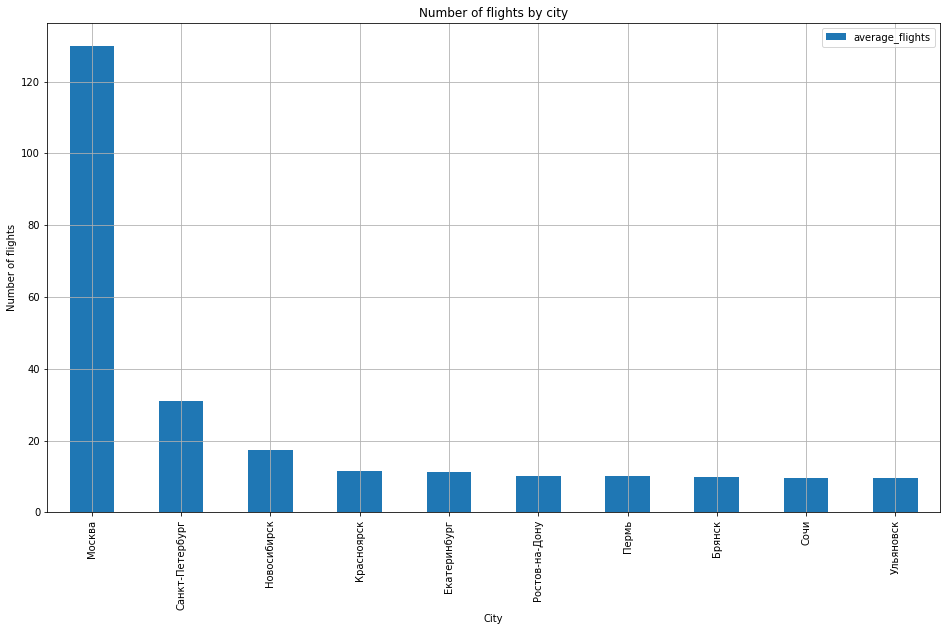

In [15]:
cities.sort_values(by='average_flights', ascending=False).head(10).plot(kind='bar', x='city', grid=True, figsize=(16,9))
plt.title('Number of flights by city')
plt.xlabel('City')
plt.ylabel('Number of flights')
plt.show()

In [16]:
cities.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


<b>Result:</b> In August 2018, Moscow was the most popular destination, the number of flights significantly exceeded those to other cities. St. Petersburg is in second place, Novosibirsk is in third.

### Conclusion

According to the analysis of flights on 8 aircraft models in September 2018, the number of flights is significantly higher for small aircraft (Cessna, Bombardier, Sukhoi).
<br>
According to the results of the analysis of flights to 101 cities of the Russian Federation in August 2018, Moscow was the most popular city of arrival, St. Petersburg was in second place, and Novosibirsk was in third.